In [75]:
import pandas as pd
from pathlib import Path
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [76]:
# Прочитати датасет
path = Path("data/clean_data.xlsx")
df = pd.read_excel(path)
df.drop(["word_count", "need_correct"], axis=1, inplace=True)

In [77]:
# Колонка з іменами та призвіщами
word_pattern = r"[A-Za-zА-Яа-яІіЇїЄєҐґ’']+" #будь яка послідовність кирилиці або латиниці є словом

# колонка з кількістю слів
df["word_count"] = (
    df["name"]  
      .fillna("") #Заповнити null щоб не падало
      .str.replace(r"\s+", " ", regex=True).str.strip() # прибрати зайві пробіли
      .str.findall(word_pattern) # знайти матчі
      .str.len() # порахувати матчі
)

df_names = df[df['word_count']>1] #тільки ті що більше одного слова
# df_names = df #для статистики імен

In [78]:
# Додати колонки з first_name та second_name

df_names = df_names.copy()

norm = (
    df_names["name"]
      .fillna("")
      .str.replace(r"\s+", " ", regex=True).str.strip()
)

df_names["second_name"]  = norm.str.extract(rf"^({word_pattern})", expand=False)
df_names["first_name"] = norm.str.extract(rf"^(?:{word_pattern})\s+({word_pattern})", expand=False)

df_names["first_name"] = df_names["first_name"].apply(
    lambda x: x[0].upper() + x[1:] if isinstance(x, str) and x else x
)

df_names.loc[df_names["first_name"] == "Мария", "first_name"] = "Марія"
df_names.loc[df_names["first_name"] == "Maria", "first_name"] = "Марія"
df_names.loc[df_names["first_name"] == "MaRya", "first_name"] = "Марія"
df_names.loc[df_names["first_name"] == "Марвя", "first_name"] = "Марія"
df_names.loc[df_names["first_name"] == "Маря", "first_name"] = "Марія"

df_names.loc[df_names["first_name"] == "Ганна", "first_name"] = "Анна"
df_names.loc[df_names["first_name"] == "анна", "first_name"] = "Анна"
df_names.loc[df_names["first_name"] == "Anna", "first_name"] = "Анна"

df_names.loc[df_names["first_name"] == "Aleksander", "first_name"] = "Олександр"
df_names.loc[df_names["first_name"] == "Александр", "first_name"] = "Олександр"
df_names.loc[df_names["first_name"] == "Алексан", "first_name"] = "Олександр"
df_names.loc[df_names["first_name"] == "Олексанр", "first_name"] = "Олександр"
df_names.loc[df_names["first_name"] == "Олександир", "first_name"] = "Олександр"
df_names.loc[df_names["first_name"] == "Олександ", "first_name"] = "Олександр"
df_names.loc[df_names["first_name"] == "Оександр", "first_name"] = "Олександр"
df_names.loc[df_names["first_name"] == "Олесандр", "first_name"] = "Олександр"

df_names.loc[df_names["first_name"] == "Олександрв", "first_name"] = "Олександра"
df_names.loc[df_names["first_name"] == "Олександа", "first_name"] = "Олександра"
df_names.loc[df_names["first_name"] == "Олексанра", "first_name"] = "Олександра"
df_names.loc[df_names["first_name"] == "Александра", "first_name"] = "Олександра"
df_names.loc[df_names["first_name"] == "Олескандра", "first_name"] = "Олександра"

df_names.loc[df_names["first_name"] == "Тарасик", "first_name"] = "Тарас"

df_names.loc[df_names["first_name"] == "София", "first_name"] = "Софія"

df_names.loc[df_names["first_name"] == "Юстина", "first_name"] = "Устина"
df_names.loc[df_names["first_name"] == "Юстинія", "first_name"] = "Устина"

df_names.loc[df_names["first_name"] == "Миколай", "first_name"] = "Микола"

df_names.loc[df_names["first_name"] == "Христинп", "first_name"] = "Христина"
df_names.loc[df_names["first_name"] == "Христя", "first_name"] = "Христина"
df_names.loc[df_names["first_name"] == "Хистина", "first_name"] = "Христина"

df_names.loc[df_names["first_name"] == "Натаоія", "first_name"] = "Наталія"
df_names.loc[df_names["first_name"] == "Наталья", "first_name"] = "Наталія"
df_names.loc[df_names["first_name"] == "Наталя", "first_name"] = "Наталія"
df_names.loc[df_names["first_name"] == "Наталия", "first_name"] = "Наталія"
df_names.loc[df_names["first_name"] == "Наташа", "first_name"] = "Наталія"
df_names.loc[df_names["first_name"] == "НАталія", "first_name"] = "Наталія"




# Вивести кількість імен
# with pd.option_context("display.max_rows", None):
#     print(df_names["first_name"].value_counts()[:100])


In [95]:
# топ найпопулярніших імен
with pd.option_context("display.max_rows", None):
    print(df_names["first_name"].value_counts())

# Порахувати частоти (включно з NaN, якщо потрібно)
s = df_names["first_name"].value_counts(dropna=False)

# Зробити таблицю з двома колонками: first_name, count
out = s.rename_axis("first_name").reset_index(name="count")

# (опційно) додати частку
out["share"] = (out["count"] / out["count"].sum()).round(4)

# Записати в Excel
out.to_excel("output\most_popular_names_total.xlsx", index=False)

# df_names.to_excel("output\most_popular_names_total.xlsx")

first_name
Марія             510
Іван              362
Анна              317
Володимир         297
Микола            259
Олександр         186
Катерина          177
Михайло           175
Василь            171
Ольга             169
Петро             159
Надія             141
Степан            135
Олена             118
Віра              105
Йосип             102
Андрій            100
Софія              98
Анастасія          95
Федір              89
Григорій           87
Тетяна             87
Антоніна           83
Сергій             82
Павло              81
Олександра         79
Антон              77
Олексій            72
Ніна               69
Євгенія            69
Галина             68
Анатолій           67
Євдокія            64
Віктор             63
Наталія            61
Валентина          54
Дмитро             51
Лідія              50
Варвара            49
Людмила            44
Ірина              40
Любов              40
Юлія               39
Юрій               38
Ксенія             37

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ПК\AppData\Local\Temp\ipykernel_6888\2207335573.py:15: SyntaxWarning: invalid escape sequence '\m'
  out.to_excel("output\most_popular_names_total.xlsx", index=False)


In [80]:
# Створення колонок з датою народження та датою смерті
s = df["dates"].astype("string").str.replace(r"[–—−]", "-", regex=True)

# витягуємо ПЕРШИЙ рік до тире (народження) і ПЕРШИЙ рік після тире (смерті)
rng = s.str.extract(r'^\s*(?:.*?(\d{3,4})).*?-\s*(?:.*?(\d{3,4})).*$')

df["birth_year"] = rng[0]
df["death_year"] = rng[1]

# якщо в комірці був лише один рік без тире — це рік смерті
single = s.str.extract(r'^\s*(?:.*?(\d{3,4}))\s*$')
df["death_year"] = df["death_year"].fillna(single[0])

# привести до числового типу з підтримкою NaN
for col in ["birth_year", "death_year"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")



In [81]:
# додати вік
df['years'] = df['death_year'] - df['birth_year']

#### Вивести список довгожителів >100 років

In [82]:
df_cent = df[(df['years'] >= 100) & (df['years'] <= 135) &  (df["name"].str.strip().str.lower() != "невідома")]
df_cent.to_excel("output\centenarians.xlsx", index=False)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ПК\AppData\Local\Temp\ipykernel_6888\4137243940.py:2: SyntaxWarning: invalid escape sequence '\c'
  df_cent.to_excel("output\centenarians.xlsx", index=False)


#### В які роки народилося найбільше довгожителів

In [83]:
# розподіл довожителів по даті народження
df_counts = (df_cent.groupby("birth_year")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)
df_counts = df_counts.reset_index(drop=True)

print(df_counts[:10])
df_counts.to_excel("output\centenarians_by_years.xlsx")

   birth_year  count
0        1885      4
1        1895      3
2        1851      3
3        1884      3
4        1806      2
5        1882      2
6        1866      2
7        1871      1
8        1901      1
9        1900      1


<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ПК\AppData\Local\Temp\ipykernel_6888\425648457.py:10: SyntaxWarning: invalid escape sequence '\c'
  df_counts.to_excel("output\centenarians_by_years.xlsx")


### Найпопулярніші імена по роках

In [84]:
df_names = df_names.copy()
s = df_names["dates"].astype("string").str.replace(r"[–—−]", "-", regex=True)

# витягуємо ПЕРШИЙ рік до тире (народження) і ПЕРШИЙ рік після тире (смерті)
rng = s.str.extract(r'^\s*(?:.*?(\d{3,4})).*?-\s*(?:.*?(\d{3,4})).*$')

df_names["birth_year"] = rng[0]
df_names["death_year"] = rng[1]


# якщо в комірці був лише один рік без тире — це рік смерті
single = s.str.extract(r'^\s*(?:.*?(\d{3,4}))\s*$')
df_names["death_year"] = df_names["death_year"].fillna(single[0])

# привести до числового типу з підтримкою NaN
for col in ["birth_year", "death_year"]:
    df_names[col] = pd.to_numeric(df_names[col], errors="coerce").astype("Int64")



In [85]:
# визначити стать
# 0) працюємо з копією
df_names = df_names.copy()

# 1) нормалізація
def norm(s: str) -> str:
    s = str(s or "").strip().lower()
    s = (s.replace("ё","е").replace("’","'").replace("`","'").replace("ʼ","'")
           .replace("ъ",""))
    return s

first = df_names["first_name"].map(norm)

# 2) словники статі (як у тебе)
male_names = {
    "іван","володимир","владимир","микола","николай","олександр","александр","михайло","михаил",
    "василь","василий","петро","петр","степан","йосип","иосиф","андрій","андрей","федір","федор",
    "григорій","григорий","юрій","юрий","семен","семён","георгій","георгий","леонід","леонид",
    "костянтин","константин","євгеній","евгений","віктор","виктор","дмитро","дмитрий","роман","олег",
    "валерій","максим","пилип","павло","павел","євген","микита","матвій","илья","ілля",
    "ростислав","борис","тимофій","тимофей","віталій","виталий","захар","євстахій","сильвестр",
    "трохим","харитон","лука","кирило","кирил","мирон","юхим","ігнатій","игнатий","тихон","станіслав",
    "тарас","зіновій","лев","геннадій","онуфрій","мойсей","орест","іларіон","арсеній","едуард",
    "остап","аркадій","вадим","макар","стефан","гаврило","сидор","порфирій","хома","яким",
    "омелян","адам","юліан","самоїл","самоіл","єфим","ефим","мартин","іоанн","іоан","сергій","сергей",
    "спиридон","савелій","серафим","отто","глеб","нікіта","ярош","мілентій","назарій","маркіян","левко","яків",
    "филипп","генадій","анатолій","филимон","леонтій","моисей","якуб","захарій","святослав",
    "карпо","федів","євдокім","устим","вікентій","констянтин","пантилимон","онісім","ігнатій",
    "ігор","артем","грогорій","андронік","афанасій","богдан","терентій","зиневий","сильвестр",
    "сазон","трофим","поликарп","назар","михаїл","діоніон","демид","демян","герасим","остапович",
    "валер","всеволод","куприян","йосиф","панкратій","яремко","ефим","степанидій","константинович",
    "генадий","вова","иван","ростислав","ніколай","василій","давид","сергій",
    "артем","грогорій","андронік","афанасій","богдан","терентій","ніканор","данило",
    "олексій","євдоким","марко","омельян","ерофей","аким","кесарий","арсентий",
    "тимон","радіон","дорофій","гнат","йон","сафрон","леон","арсентій","нікіфор",
    "оксентій","агей","вася","лаврін","авксентій","михаіл","філіп","харітон",
    "феофан","арсений","теодозій","осип","софон","онісій","венедикт","наум",
    "аврам","денис","валентин","яков","лаврентій","кіндрат","діоніс","рома","афон",
    "єронім","сава","гліб","охрим","єфимій","мефодій","альберт","wladyslaw",
    "майсей","сергійко","адольф","францишек","вячеслав","гавриїл","виталік",
    "ярослав","прокопій","ростаслав","володя","антон","агафон","трифон","іосиф","олексей","естафій","митрофан","евдоким",
    "кори́нський","андрoник","іванноч","дорофей","данил","ваван","янна","стасик","анатолий","кирилович",
    "льоня","касіан","евгекий","иларион","онуфрий","антон","сільвестр","арьем","барщевський","іллі",
    "єронім","боис","вітковський","амвросій","йосипович","вячеслав","клим","jobs","аполон","василько",
    "мирослав","полікарп","арсентій","арсений","васильович","ярополк","федоніда","анатолій","степаг",
    "касьян","толя","гаврилович","семенович","іі","спепан","тимофійко","ігнат","якимович","ананій",
    "фадей","варфоломій","климентій","митрофан","євстафій","єгор","іосафат","каленик","клим","архип",
    "фома","ян","jozef","pawel","henryk","winsentiy","henyk","jan","miroslaw","stefan","wiktoria",
    "wladyslaw","mieczyslaw","piotr","stanislaw","konstanty","roch","prokop","dobrzynski","kyraczow",
    "pizon","ziolkowski","molski","dabek","edward","lakytowicz","miroslaw","tadeush","avram","feliks",
    "nestor","сергій","сегій","варалам","ріман","григорій","ніканор","марко","омельян","арсентий",
    "сафрон","леон","никифор","оксентій","агей","лаврін","михаіл","філіп","харітон","теодозій",
    "осип","софон","онісій","венедикт","наум","аврам","денис","валентин","яков","лаврентій","кіндрат",
    "діоніс","рома","афон","сава","гліб","охрим","єфрем","фотій","пантелеймон","веніамін","прокіп",
    "корній","мстислав","виталік","давид","ярослав","омельян","влас","агафій","єремій","яків"
}


female_names = {
    "марія","анна","катерина","ольга","надія","надежда","оксана","олена","елена","віра","вера",
    "софія","софия","анастасія","анастасия","тетяна","татьяна","антоніна","антонина","олександра",
    "ніна","євгенія","евгения","єлизавета","елизавета","галина","наталія","валентина","лідія","лидия",
    "варвара","людмила","ірена","іріна","ирина","любов","юлія","юлия","ксенія","текля","зінаїда","зинаида",
    "єфросинія","ефросинія","параскевія","парасковія","параскева","параска","марфа","агафія",
    "тамара","феодосія","дарія","раїса","степанида","степаніда","фекла","пелагея","пелагія","єва",
    "федора","христина","уляна","устина","світлана","анісія","клавдія","лариса","зоя",
    "меланія","поліна","лукія","соломія","лілія","ярослава","валерія","вікторія","розалія","феня",
    "василіса","стефаніда","василина","зина","лія","матрона","агнія","дарья","евгенія","лина",
    "євдокія","харитина","лукіяна","константинівна","константиновна","ефілія","іонна",
    "зінаіда","наїла","раїса","емілія","паша","олимпіада","люда","неоніла","афанасія",
    "сокрина","феолосія","марина","аідія","афанасіївна","сільвія","парасковья","домінікія",
    "аліна","павліна","ефімія","євдокія","екатерина","орліна","капітуліна","секлітія","мотря",
    "васиина","світлана","стефанида","ефилія","наила","раиса","олимпиада","ліза",
    "ірина","параскевия","євдокія","домна","палагея","глафірія","орлина","акуліна",
    "єлізавета","іуланія","надя","катирина","мокрина","ульяна","екатарина","івдукія",
    "ярина","ерина","зіна","доминика","прасковья","таня","зіновія","васса","лукерія",
    "любовь","лікерія","мокрена","агапія","павліна","устинія","таїса","юзефа",
    "фекля","серафима","єлена","алла","теодорія","онисія","емма","леокадія","ксеня",
    "ханна","фіона","пистимія","василиса","милада","магдалена","михайлина","алевтина",
    "леонтина","цеслава","руфима","маргарита","броніслава","есмеральда","людвіка",
    "олімпіада","сусана","фрасина","альбіна","фріда","розарія","прокопюк","паракеівна","м","лаврнтія","костюки","надежді","гордіюк","тисина","михаіла","стапаніда",
    "йолянський","устимейц","михайлович","від","хрест","гаврож","ев","степановна","ткачук","устимович",
    "жалізний","вікентійович","іванович","арсенович","сегій","дитяча","семенюк","семенівна","севостин",
    "дитячі","прокопевич","зосип","юакимович","в","александрович","к","козак","а","сильвестрович",
    "вік","носилю","ополон","прокофівна","п","р","с","афанасьев","іларіонович","йосипівна","евдокія",
    "прокопьевич","киричук","антон","дарнофонічна","евдоким","дидковска","гузовской","гузовська","бяковь",
    "аомінія","дмитрій","ульян","купріян","фектостина","акимь","олен","лівіцкій","лукіч","соломоній",
    "осиповна","наркисовича","подзізей","ростисав","ареевич","емритния","штакельберг","е","т","алiксан",
    "плити","f","мичислав","васильев","леониль","петрович","григорович","васи","masse","дмитр","федонович",
    "саша","фіофан","матіюк","ивановичь","а","ваталія","калійник","костюк","miaил","о","дм","саша","монтій",
    "ивана","павл","дит","дмбровський","іванович","тг","пс","капінскіє","полк","старков","чи","і","в","и",
    "витя","алексей","горпина","ігнат","селемона","агафим","евдокия","аксентій","феодосій","мазурок",
    "купріян","дорофей","антніна","юля","данил","ваван","янна","сашенька","коваль","покіп","ефн","параскавия",
    "в","дит","никифор","юхимія","котивська","павловна","прокопівна","мокреня","ю","варварв","андорфей",
    "сільтвестр","вітковський","антонівна","вірв","а","р","в","о","аполон","я","і","іліч","стефанія",
    "р","ольтга","мартинівна","п","йосипівна","іфрина","борцям","гачевська","п","степаг","льоня","володя",
    "в","женя","сидір","стах","п","п","никифор","севастьян","магдплина","саша","а","сашенька","іі","спепан",
    "ауліта","п","о","гала","феддір","могила","мусій","дит","карп","олежик","миколка","брат","ісак","ілонім",
    "н","ф","лбоня","кузьмірук","к","д","геоггій","к","полієвкт","к","в","могила","могила","франк","ксенофонт",
    "е","івае","ромка","в","людочка","а","ф","п","г","а","військовим","розвідка","федоров","рита","ігнат","саша",
    "альона","мусій","ольна","н","дит","єфстафій","ратара","хрест","хрест","килина","графа","діна","памятник",
    "балицька","памятник","могила","памятник","митрофанович","могила","мотруна","арроник","степанівна",
    "антона","говдій","слава","купріян","м","а","а","кулинь","п","хрест","вячкслав","дит","хрест","римa",
    "євчтафій","м","каленик","люся","галя","аполоній","талеус","іванович","маланія","кузьма","нікoн","панас",
    "с","і́ра","гликерія","дмитрій","мирослава","дмитрій","галинка","герман","м","і","архип","д","в","катеринп",
    "туня","садон","владислав","zvla","дит","mieczyslaw","bartoszewska","польська","skorzewski","франциск",
    "петронеля","петрунеля","kopczvski","tomczuk","s","і","kopczynski","szvrynskich","франко","оленочка",
    "франя","нінв","галик","кузьмв","м","т","раїна","м","winsentiy","henyk","люба","цителія","ронна","грабарчук",
    "раіна","елла","польська","лукян","ніканорович","даринка","а","в","з","мотрона","нінв","франк","dudek",
    "мхайло","ромчик","jan","п","спепан","пеларія","альберт","онисим","неля","keckiego","szuper","богуслав",
    "юрасик","герaро","oton","єфрем","а","katarzyna","ola","баджянов","м","єрефей","польські","домнікія",
    "дмитрій","ромчик","домникія","карчковскі","перто","могили","н","капличка","jan","ісаак","ciozinski",
    "brzozeiwe","хрест","molksi","гaнс","фомін","karwer","ольгп","emilia","dabek","бородинцям","дмитрук",
    "аверій","марк","корній","анікин","аріадна","дмця","в","jzagielska","sofia","усzynska","польський","j","buk",
    "woznicki","даниїл","ro","м","польські","анатолія","л","антонович","леоніда","шуровських","склеп","хрест",
    "купріян","геогргій","агрепіна","л","п","т","вишневська","аполон","склеп","інна","dobrzynski","z","дитячі",
    "парціцій","анеатолій","с","памятник","довган","польська","ярополк","польський","польські","нанна",
    "ларгій","яніна","с"
}

# 3) стать за першим ім’ям
df_names["sex"] = np.where(
    first.isin(male_names), "M",
    np.where(first.isin(female_names), "F", "U")
)

#сміттєві односимвольні first_name → U
df_names.loc[first.str.len() <= 1, "sex"] = "U"



In [86]:
# Список найпопулярніших імен по роках народження
df_clean = df_names.copy()
df_clean = df_clean[
    df_clean["name"].fillna("").str.strip().str.lower() != "невідома"
]
df_clean = df_clean.dropna(subset=["birth_year"])


df_sf = df_clean[df_clean["sex"].isin(["M","F"])]

top_by_sex = (
    df_sf.groupby(["birth_year", "sex", "first_name"])
         .size().rename("count").reset_index()
         .sort_values(["birth_year", "sex", "count"], ascending=[True, True, False])
         .drop_duplicates(["birth_year", "sex"])   # топ-1 в межах року та статі
)

# розкладаємо у широку форму: окремі колонки для чоловічого та жіночого топ-імен
result = (
    top_by_sex
      .pivot(index="birth_year", columns="sex", values=["first_name","count"])
      .rename(columns={"M":"male","F":"female"})
)

# підчистити багаторівневі заголовки
result.columns = [f"{lvl2}_{lvl1}" for lvl1, lvl2 in result.columns]
result = result.rename(columns={
    "male_first_name":"male_name", "male_count":"male_count",
    "female_first_name":"female_name", "female_count":"female_count"
}).reset_index()

# df_top1 = df_top1[df_top1["birth_year"]>1800]
result = result[result["birth_year"]>1800]

result.to_excel("top_names.xlsx")

In [87]:
# виввід списку імен в файл 
result.to_excel("output\most_popular_names_by_years.xlsx")

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ПК\AppData\Local\Temp\ipykernel_6888\2452727443.py:2: SyntaxWarning: invalid escape sequence '\m'
  result.to_excel("output\most_popular_names_by_years.xlsx")


Динаміка народження по статті

In [90]:
df_sex = df_names.copy()
df_sex["birth_year"] = pd.to_numeric(df_sex["birth_year"], errors="coerce")
df_sex["sex"] = df_sex["sex"].str.upper().str.strip()
df_sex = df_sex[df_sex["sex"] != "U"]

# 3) Підрахунок за (рік, стать) і розклад у широку форму
year_counts = (
    df_sex.groupby(["birth_year", "sex"])
      .size().unstack(fill_value=0)      # колонки M, F
      .rename(columns={"M": "male", "F": "female"})
      .reset_index()
      .sort_values("birth_year")
)

# (опційно) додати загальну кількість за рік та частки
year_counts["total"] = year_counts["male"] + year_counts["female"]
year_counts["male_share"] = (year_counts["male"] / year_counts["total"]).round(3)
year_counts["female_share"] = (year_counts["female"] / year_counts["total"]).round(3)
year_counts.to_excel("output\sex_desc.xlsx")


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ПК\AppData\Local\Temp\ipykernel_6888\2621573410.py:19: SyntaxWarning: invalid escape sequence '\s'
  year_counts.to_excel("output\sex_desc.xlsx")


- найпопулярніші імена по даті народження
- рік народження довгожителів
- рік в який народжувалися ті, хто живуть найменше
- найпопулярніші імена на кладовищі
- народження щороку по статях
- найвища смертність по роках

### Розподіл народжуваност по статті

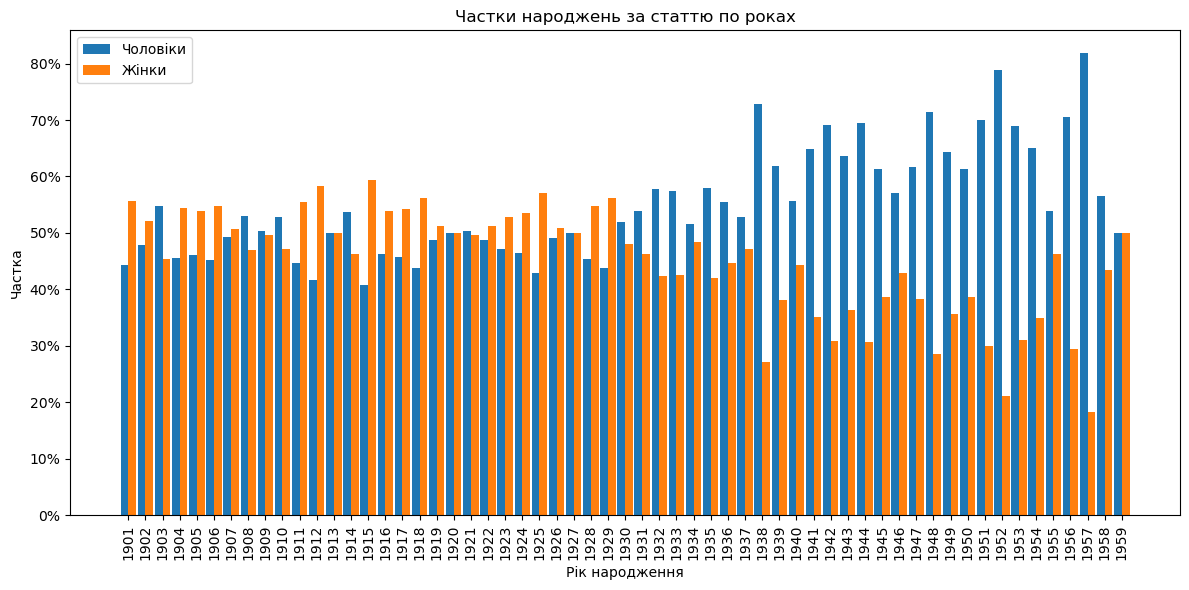

In [89]:
# розподіл народжуваност по статті
# Візьмемо лише потрібні колонки, приберемо NaN
year_counts = year_counts[(year_counts["birth_year"]>1900) & (year_counts["birth_year"]<1960)]
df_plot = year_counts[["birth_year", "male_share", "female_share"]].copy()
df_plot = df_plot.dropna(subset=["birth_year", "male_share", "female_share"])

# Переконайся, що рік — число, а частки — у [0,1]
df_plot["birth_year"] = pd.to_numeric(df_plot["birth_year"], errors="coerce")
df_plot["male_share"] = pd.to_numeric(df_plot["male_share"], errors="coerce")
df_plot["female_share"] = pd.to_numeric(df_plot["female_share"], errors="coerce")


this_year = pd.Timestamp.today().year
df_plot = df_plot[df_plot["birth_year"].between(1800, this_year)]

# Сортуємо за роком
df_plot = df_plot.sort_values("birth_year")

# Параметри для групованих стовпчиків
x = np.arange(len(df_plot))
w = 0.45

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - w/2, df_plot["male_share"].values, width=w, label="Чоловіки")
ax.bar(x + w/2, df_plot["female_share"].values, width=w, label="Жінки")

ax.set_xticks(x)
ax.set_xticklabels(df_plot["birth_year"].astype(int), rotation=90)
ax.set_xlabel("Рік народження")
ax.set_ylabel("Частка")
ax.set_title("Частки народжень за статтю по роках")
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # від 0 до 1 як %
ax.legend()
plt.tight_layout()
plt.show()